# 【問題1】練習のために特徴量の選択
データセットを読み込んだ後、説明変数GrLivAreaとYearBuilt、目的変数SalePriceをそれぞれ抜き出してください。

In [298]:
%matplotlib inline
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
warnings.simplefilter("ignore")
data = pd.read_csv("../week3/train.csv")
label = ["GrLivArea","YearBuilt","SalePrice"]
df = data.loc[:,label]
display(df.head())

,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000


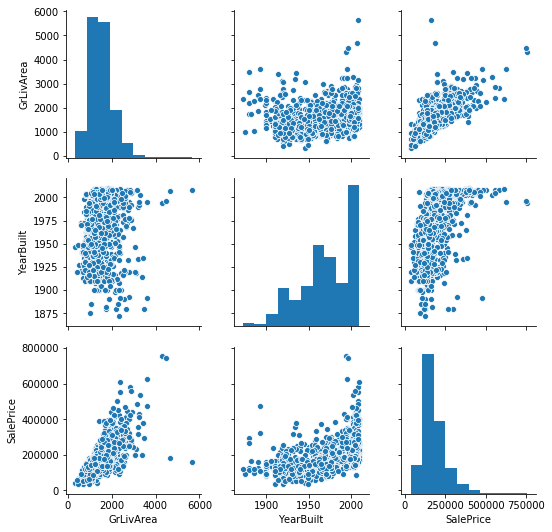

In [299]:
#散布図行列
sns.pairplot(df)
plt.show()

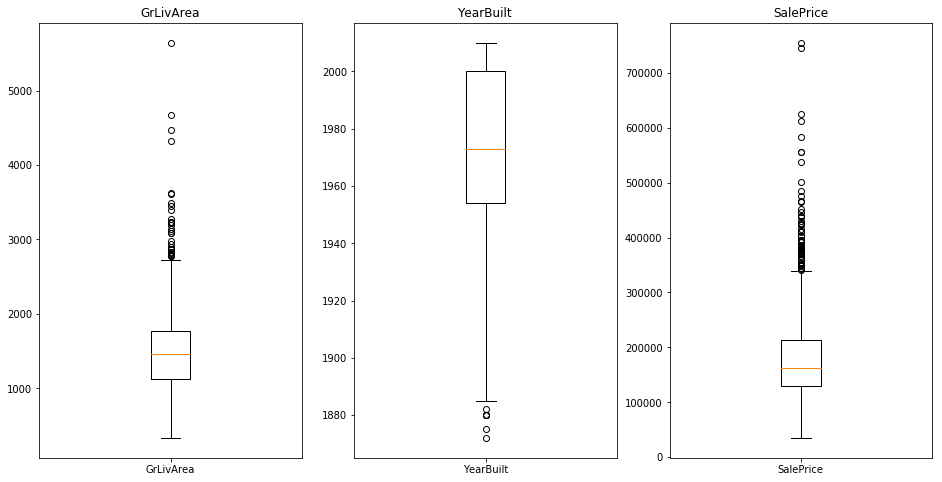

In [300]:
#箱ひげ図
fig,ax = plt.subplots(1,3,figsize = (16,8))
for i in range(3):
    ax[i].set_title(label[i])
    ax[i].boxplot(df.iloc[:,i],labels = [label[i]])

plt.show()

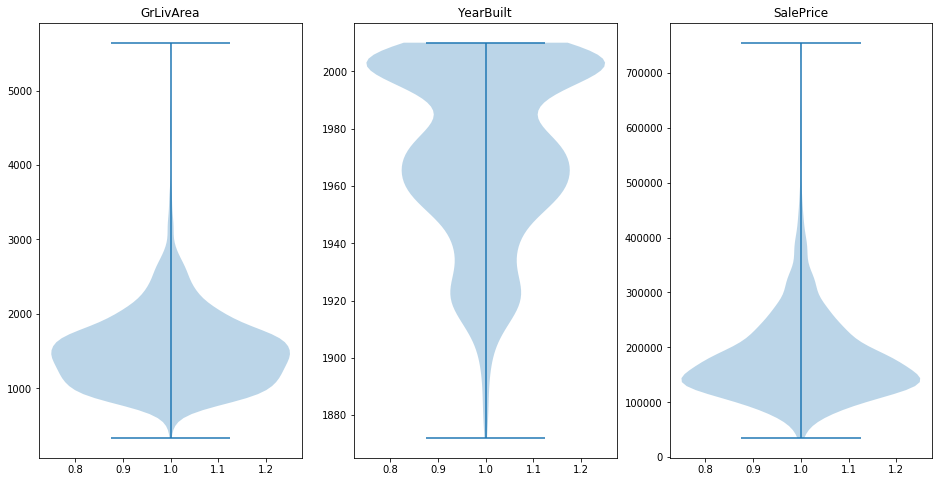

In [301]:
#バイオリン図
fig,ax = plt.subplots(1,3,figsize = (16,8))
for i in range(3):
    ax[i].set_title(label[i])
    ax[i].violinplot(df.iloc[:,i])
plt.show()

In [302]:
#検証用データと訓練用データに分け、訓練用データを用いて標準化
x_train,x_test,y_train,y_test = train_test_split(df.iloc[:,0:2],df.SalePrice,train_size = 0.8)
scaler_x = StandardScaler()
scaler_y = StandardScaler()
scaler_x.fit(x_train)
scaler_y.fit(y_train[:,np.newaxis])

x_train_std = scaler_x.transform(x_train)
x_test_std = scaler_x.transform(x_test)
y_train_std = scaler_y.transform(y_train[:,np.newaxis]).flatten()
y_test_std = scaler_y.transform(y_test[:,np.newaxis]).flatten()

In [303]:
#線形回帰を行い、学習、推定、評価まで
lr = LinearRegression()
lr.fit(x_train_std,y_train_std)  #学習
y_pred = lr.predict(x_test_std)  #推定
print("平均二乗誤差：{}".format(mean_absolute_error(y_test_std, y_pred)))

平均二乗誤差：0.37917037078558014


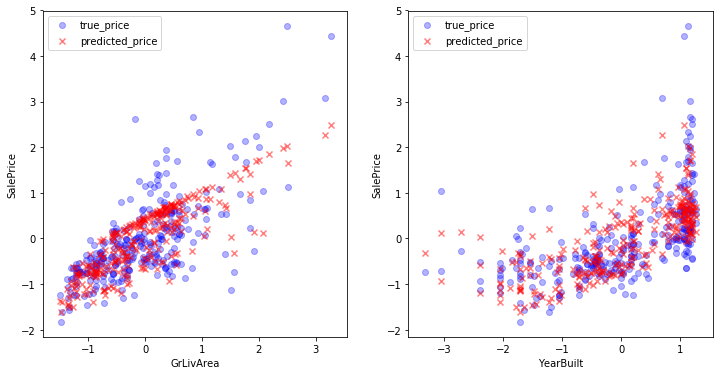

In [304]:
#グラフを用いて可視化
fig,ax = plt.subplots(1,2,figsize=(12,6))
for i in range(2):
    ax[i].set_xlabel(df.keys()[i])
    ax[i].set_ylabel("SalePrice")
    ax[i].scatter(x_test_std[:,i],y_test_std,color = "b",alpha = 0.3,label = "true_price")
    ax[i].scatter(x_test_std[:,i],y_pred,color = "r",alpha = 0.5,label = "predicted_price",marker = "x")
    ax[i].legend()
plt.show()

# 【問題3】手法の比較
以下の全ての手法について学習・推定・評価・可視化を行ってください。そして、指標値を１つの表にまとめてください。その表と可視化した図を利用して結果を簡単に考察してください。どの手法がどの指標値が良かったかや、どういった図になっていたかを述べてください。

線形回帰  
SVM  
決定木  
ランダムフォレスト

In [305]:
#線形回帰
values = np.empty(4)
values[0] = mean_absolute_error(y_test_std, y_pred)

平均二乗誤差：0.31970545174930226


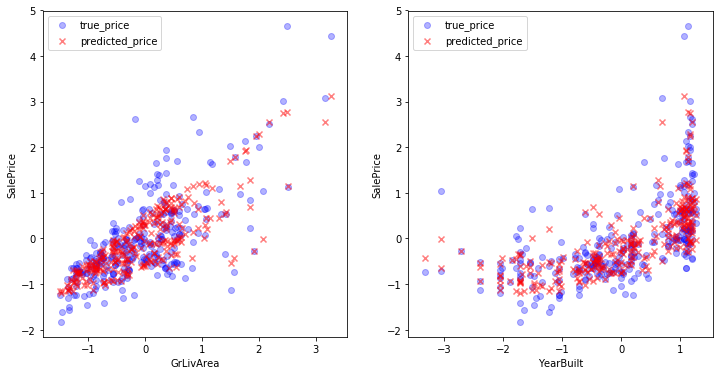

In [307]:
#SVM
svr = svm.SVR()
svr.fit(x_train_std,y_train_std)
y_pred2 = svr.predict(x_test_std)
values[1] = mean_absolute_error(y_test_std, y_pred2)
print("平均二乗誤差：{}".format(mean_absolute_error(y_test_std, y_pred2)))

#可視化
fig,ax = plt.subplots(1,2,figsize=(12,6))
for i in range(2):
    ax[i].set_xlabel(df.keys()[i])
    ax[i].set_ylabel("SalePrice")
    ax[i].scatter(x_test_std[:,i],y_test_std,color = "b",alpha = 0.3,label = "true_price")
    ax[i].scatter(x_test_std[:,i],y_pred2,color = "r",alpha = 0.5,label = "predicted_price",marker = "x")
    ax[i].legend()
plt.show()

平均二乗誤差：0.31970545174930226


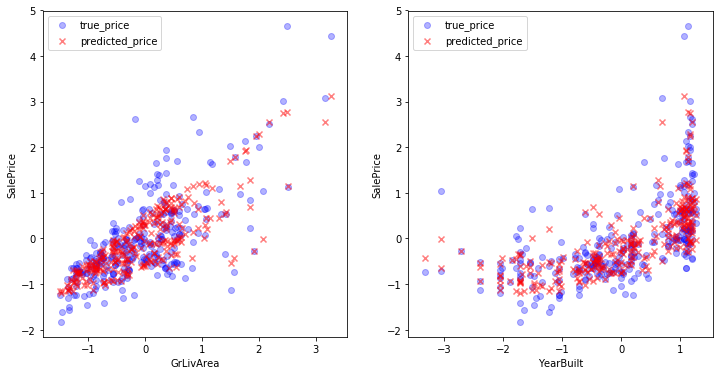

In [308]:
#決定木
dt = DecisionTreeRegressor()
dt.fit(x_train_std,y_train_std)

y_pred3 = svr.predict(x_test_std)
values[2] = mean_absolute_error(y_test_std, y_pred3)
print("平均二乗誤差：{}".format(mean_absolute_error(y_test_std, y_pred3)))

#可視化
fig,ax = plt.subplots(1,2,figsize=(12,6))
for i in range(2):
    ax[i].set_xlabel(df.keys()[i])
    ax[i].set_ylabel("SalePrice")
    ax[i].scatter(x_test_std[:,i],y_test_std,color = "b",alpha = 0.3,label = "true_price")
    ax[i].scatter(x_test_std[:,i],y_pred3,color = "r",alpha = 0.5,label = "predicted_price",marker = "x")
    ax[i].legend()
plt.show()

平均二乗誤差：0.31970545174930226


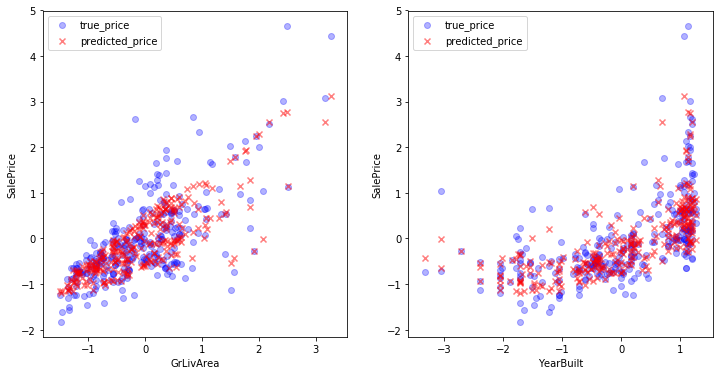

In [309]:
#ランダムフォレスト
rf = RandomForestRegressor()
rf.fit(x_train_std,y_train_std)

y_pred4 = svr.predict(x_test_std)
values[3] = mean_absolute_error(y_test_std, y_pred4)
print("平均二乗誤差：{}".format(mean_absolute_error(y_test_std, y_pred4)))

#可視化
fig,ax = plt.subplots(1,2,figsize=(12,6))
for i in range(2):
    ax[i].set_xlabel(df.keys()[i])
    ax[i].set_ylabel("SalePrice")
    ax[i].scatter(x_test_std[:,i],y_test_std,color = "b",alpha = 0.3,label = "true_price")
    ax[i].scatter(x_test_std[:,i],y_pred4,color = "r",alpha = 0.5,label = "predicted_price",marker = "x")
    ax[i].legend()
plt.show()

In [310]:
#指標値の表
value_data = pd.DataFrame(values,index = ["Linear Regression","SVR","Decision Tree Regressor","Random Forest Regressor"],columns = ["Mean Squared Error"])
display(value_data)

,Mean Squared Error
Linear Regression,0.379170
SVR,0.319705
Decision Tree Regressor,0.319705
Random Forest Regressor,0.319705
